# BUSINESS CASE

* Create a predictive model using machine learning techniques to predict whether donor will donate blood next time when the vehical comes to campus in March 2007

* Blood transfusion is vital for saving lives, yet ensuring enough supply remains a challenge. Using donor history data from a mobile blood donation vehicle in Taiwan, this project predicts whether a donor will give blood at the next drive in March 2007. The model helps identify likely donors, enabling better planning, targeted outreach, and a more reliable blood supply for patients in need.

# DOMAIN ANALYSIS

In [1]:
# importing libraries
import pandas as pd      # import pandas for analyzing, cleaning ,exploring and manipulating data
import numpy as np       # import numpy for working with mathematices part/numerical data
import seaborn as sns    # import seaborn for visualize data and plotting statistical graph
import matplotlib.pyplot as plt    # import matplotlib for visualize data and plotting statistical graph
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
import pickle     # used to save the model
import warnings   # import warnings
warnings.filterwarnings('ignore')   # used to ignore the warnings

In [2]:
# data is in csv file so we have to call pd.read_csv from pandas and stored in variable named "df"
df = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv',index_col=0)
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0
...,...,...,...,...,...
698,23,1,250,23,0
433,16,3,750,86,0
360,21,2,500,52,0
541,39,1,250,39,0


In [3]:
print(df.duplicated().sum())

153


In [4]:
df[df.duplicated()]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
638,2,6,1500,15,1
463,2,3,750,4,1
539,2,6,1500,16,1
175,4,10,2500,28,1
286,2,5,1250,16,0
...,...,...,...,...,...
30,23,1,250,23,0
337,23,1,250,23,0
496,23,1,250,23,0
169,23,1,250,23,0


In [5]:
df[df.duplicated(keep=False)]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
499,2,6,1500,15,1
638,2,6,1500,15,1
345,2,3,750,4,1
463,2,3,750,4,1
8,2,6,1500,16,1
...,...,...,...,...,...
30,23,1,250,23,0
337,23,1,250,23,0
496,23,1,250,23,0
169,23,1,250,23,0


In [6]:
df.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [7]:
df.head()  # shows first 5 rows of dataset

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [8]:
df.tail()  # shows last 5 rows of dataset

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
698,23,1,250,23,0
433,16,3,750,86,0
360,21,2,500,52,0
541,39,1,250,39,0
74,72,1,250,72,0


# Features Information

* Months since Last Donation :- This is the number of Months since the donor's most recent donation.
* Number of Donation :- This is the Total number of Donations that the donor has made.
* Total Volume Donated :- This is the total amount of Blood that the donor has donated in cubuc centimeters
* Months since First Donation  :- This is the number of months since the donor's first donation
* Made Donation in March 2007 :- A binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood , 0 stands for not donating blood)

# BASIC CHECKS

In [9]:
df.info() # dataset  information of each and every features

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 619 to 74
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   576 non-null    int64
 1   Number of Donations          576 non-null    int64
 2   Total Volume Donated (c.c.)  576 non-null    int64
 3   Months since First Donation  576 non-null    int64
 4   Made Donation in March 2007  576 non-null    int64
dtypes: int64(5)
memory usage: 27.0 KB


# Insights

* No any null values in any Features.
* total memory usage 27.0 KB
* Dtype of all features is int64
* Total 5 features and 576 entries(rows or Data)

In [10]:
df.describe()  # statistical information of the Dataset

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [11]:
# applied a loop to check unique values of each column

for i in df.columns:
    a = df[i].unique()
    print("------")
    print(f"unique values in column'{i}':")
    print(a) # print the unique values of each Features

------
unique values in column'Months since Last Donation':
[ 2  0  1  4  5  3 12  6 11  9 10 13 14  8  7 16 23 21 18 22 26 35 74 15
 20 17 25 39 72]
------
unique values in column'Number of Donations':
[50 13 16 20 24  4  7 12 46  3 10  6  5 14 15 11  8  9  2 19 17  1 22 18
 38 43 44 21 33]
------
unique values in column'Total Volume Donated (c.c.)':
[12500  3250  4000  5000  6000  1000  1750  3000 11500   750  2500  1500
  1250  3500  3750  2750  2000  2250   500  4750  4250   250  5500  4500
  9500 10750 11000  5250  8250]
------
unique values in column'Months since First Donation':
[98 28 35 45 77  4 14 47 15 11 48 49 16 40 21 58 64 22 53 69 36  2 46 26
 74 25 51 71 23 86 38 34 70 59 82 61 57 79 41 33 10 88 19 37  9 52 76 27
 24 39 63 43 75 73 78 50 60 29 17 72 30 89 87 93 95 83 12 32 18 55  3 13
 62 54 31]
------
unique values in column'Made Donation in March 2007':
[1 0]


# EDA

#### EDA in machine learning is the process of analyzing and visualizing datasets to summarize their main characteristics, often using statistical graphics and visualization techniques

# 1. UNIVARIATE ANALYSIS

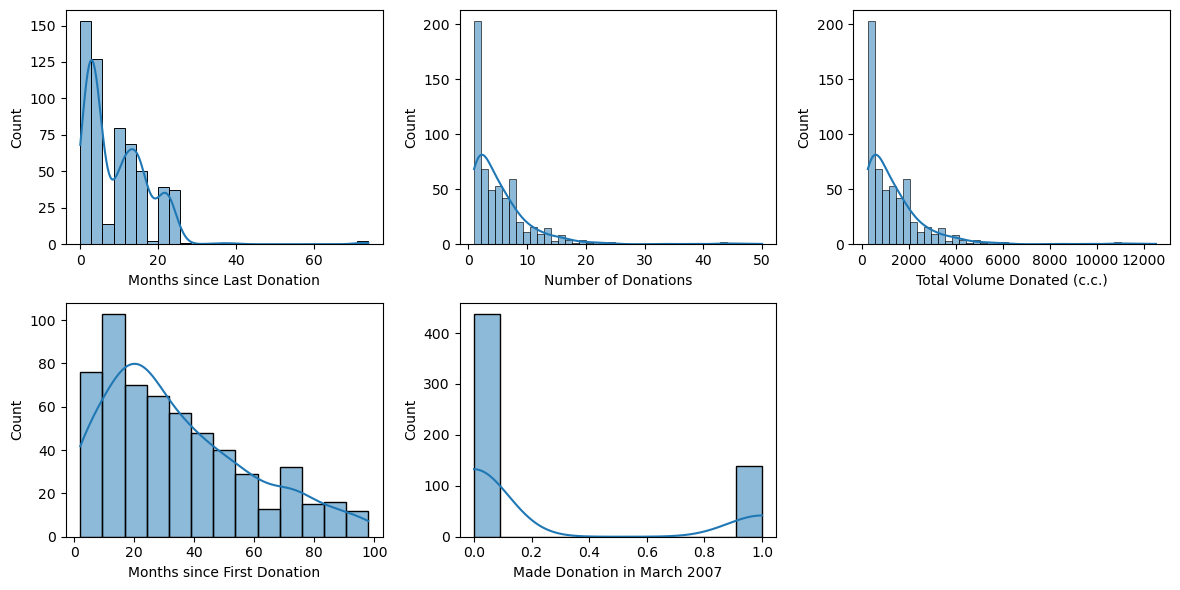

In [12]:
plt.figure(figsize=(12,6))
plot = 1

for i in df:
    if plot <= 5:
        plt.subplot(2,3,plot)
        sns.histplot(df[i],kde=True)
        # plt.xlabel(column,fontsize=25)
        # plt.ylabel("Count",fontsize=20)
        # plt.yticks(fontsize=15)
    plot = plot+1
plt.tight_layout()  # used for stop to overlapping

* ## Analysis

## by univariate analysis we can see that most of the features are following the right skewed
## and dataset is imbalanced as there are non donor are high as compare to donor.

# 2. BIVARIATE ANALYSIS

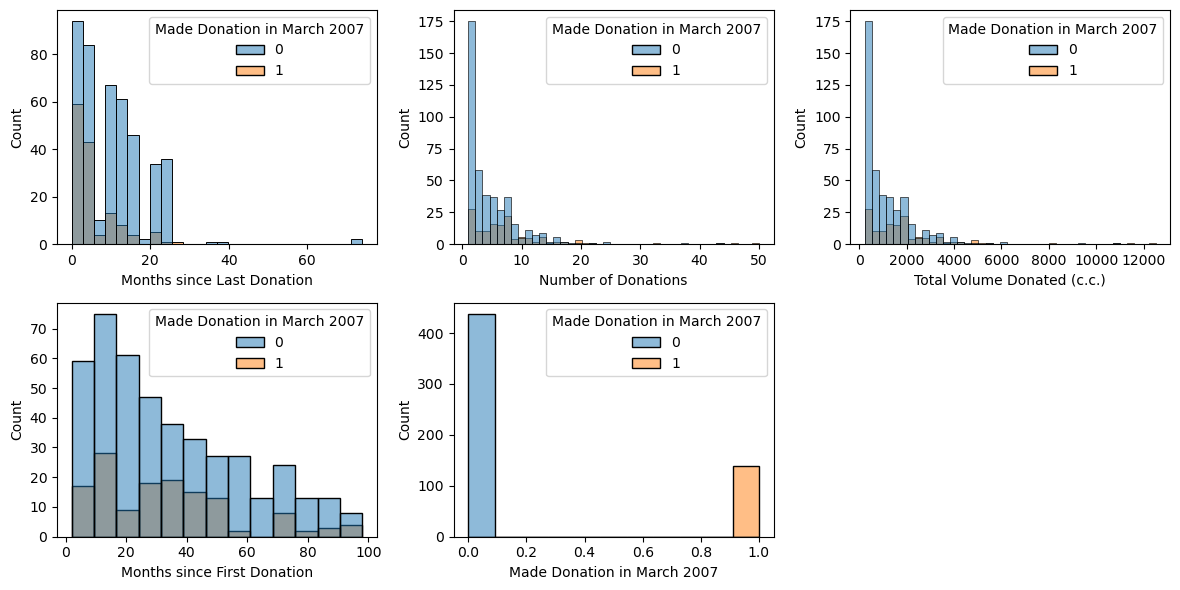

In [13]:
plt.figure(figsize=(12,6))
plot = 1

for i in df:
    if plot <= 5:
        plt.subplot(2,3,plot)
        sns.histplot(x=df[i],hue = df['Made Donation in March 2007'])
        # plt.xlabel(column,fontsize=25)
        # plt.ylabel("Count",fontsize=20)
        # plt.yticks(fontsize=15)
    plot = plot+1
plt.tight_layout()  # used for stop to overlapping

# 3. MULTIVARIATE ANALYSIS

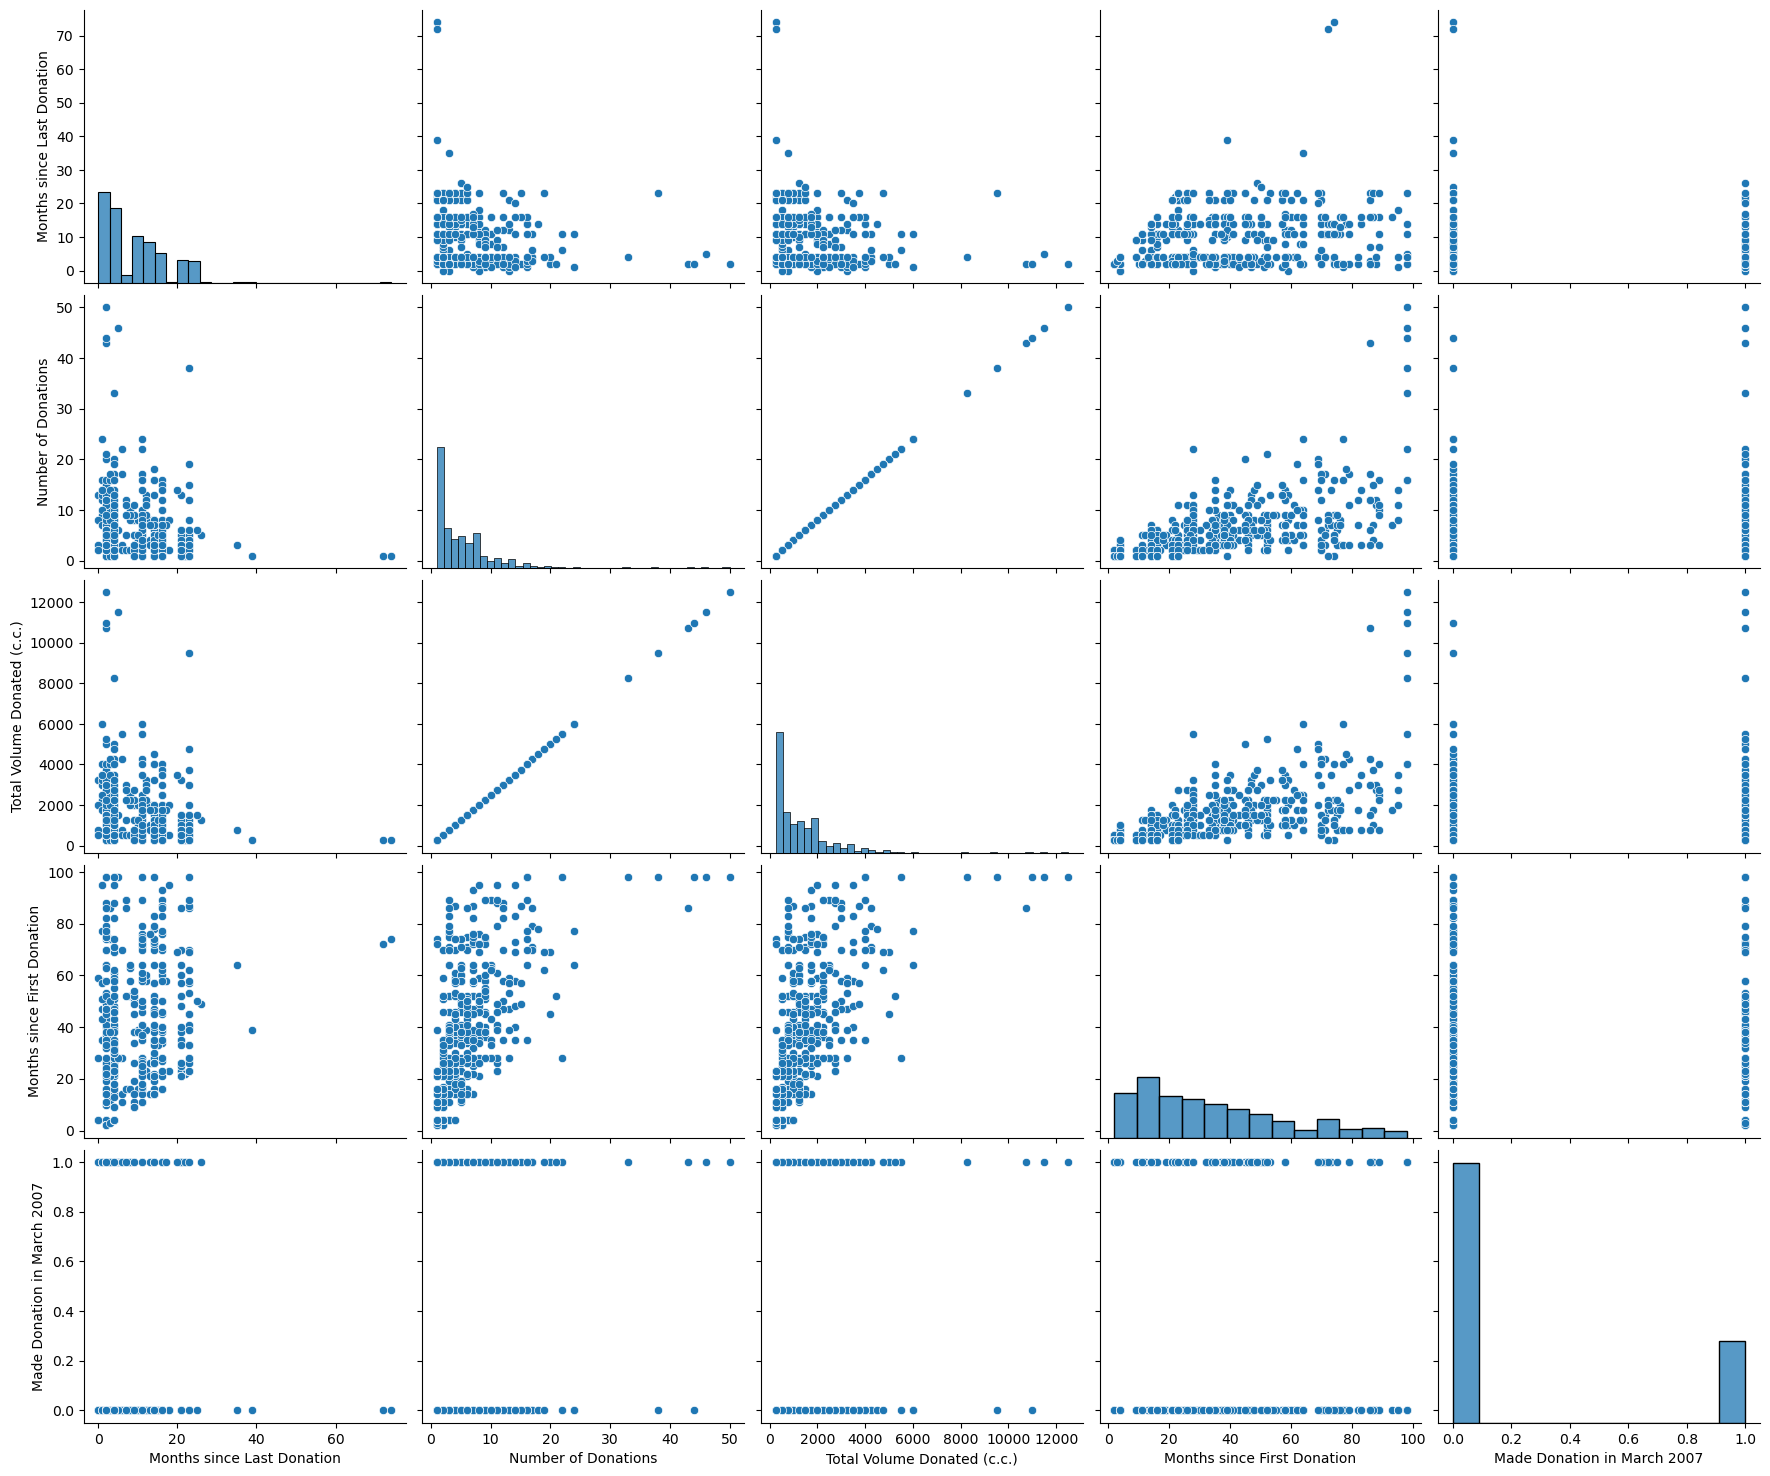

In [14]:
sns.pairplot(df,height=3, aspect=1.2)

* ## By multivariate analysis we can see that if number of donations increases then Total volume donated is also increases
* ## in output feature non blood donate people are more as compare to donor people

# FEATURE ENGINEERING

* ### Feature engineering is most important part of any Machine learning model , to make perfect and efficient model good feature engineering is must required

## 1. DATA PREPROCESSING

In [15]:
df.isnull().sum()    # isnull() will give null values and sum() will give the total count of the null values

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

# Insights

* ### no any Null values in any Features of this dataset

# HANDLING OUTLIERS

 * ### Outliers are extreme values that differ significantly from the rest of the data. They matter in modeling because they can skew results, increase error, and reduce model accuracy. Sometimes, outliers also carry important hidden patterns (e.g., rare donor behavior), so handling them carefully is essential.

In [16]:
df.columns  # shows the all columns of the dataset

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

#### Hare we have 3 continuous features in which we have to handle outliers if exists
#### 1.Months since Last Donation
#### 2.Total Volume Donated (c.c.)
#### 3.Months since First Donation

In [17]:
# Here we have stored all the continuous features in a form of list named continuous_features

continuous_features = [
    'Months since Last Donation',
    'Total Volume Donated (c.c.)',
    'Months since First Donation']

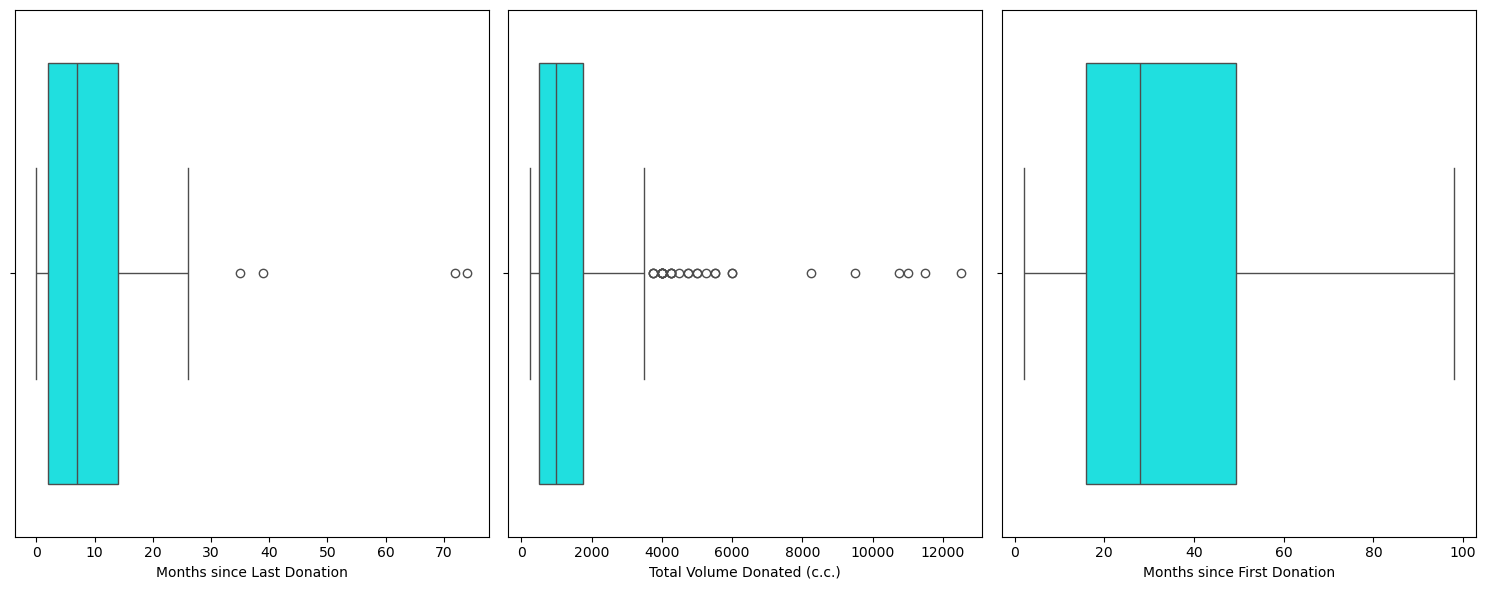

In [18]:
# Loop through features and plot boxplots
plt.figure(figsize=(15,6))      # defined size of graph using matplotlib library
for i, col in enumerate(continuous_features, 1):   # applied the loop
    plt.subplot(1, 3, i)  # create a grid of 2x2 plots
    sns.boxplot(x=df[col], color='cyan')   # applied boxplot to detect Outliers
    plt.xlabel(col)

plt.tight_layout()      # help to stop the overlapping
plt.show()    # shows the graphs

# Insights

* ###  Here we can see there are only two Features in which Outliers are detected which we have to fill
* ### i have use IQR Method to handle outliers by applying loop

In [19]:
outlier_features= [
    'Months since Last Donation',
    'Total Volume Donated (c.c.)'
]
for col in outlier_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    median_value = df[col].median()
    df.loc[outliers, col] = median_value

    print(f"Column: {col} → Outliers replaced with median ({median_value})")


Column: Months since Last Donation → Outliers replaced with median (7.0)
Column: Total Volume Donated (c.c.) → Outliers replaced with median (1000.0)


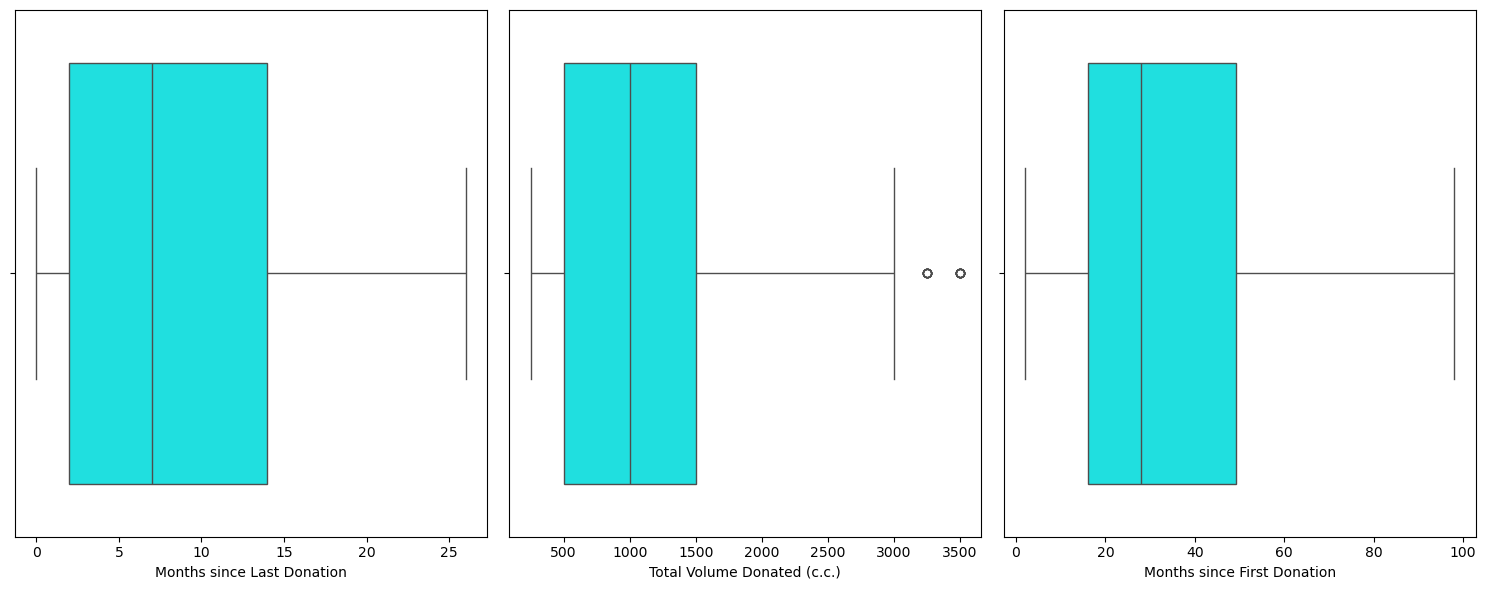

In [20]:
continuous_features = [
    'Months since Last Donation',
    'Total Volume Donated (c.c.)',
    'Months since First Donation'
]

plt.figure(figsize=(15,6))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(1, 3, i)  # create a grid of 2x2 plots
    sns.boxplot(x=df[col], color='cyan')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# SCALING

* ####  Scaling is used to standardize the range of features so that no variable dominates just because of its larger values. It helps models that are sensitive to feature magnitude (like logistic regression, kNN, or SVM) perform better and converge faster.

In [21]:
from sklearn.preprocessing import MinMaxScaler    # import MinMaxScaler from sklearn.preprocessing
scaler= MinMaxScaler()     # Stored MinMaxscaler in variable named "scaler"
sc = ["Months since Last Donation","Total Volume Donated (c.c.)","Months since First Donation"]   # stored the Features in a form of list on which scaling is to be applied
scaler.fit_transform(df[sc])    

array([[0.07692308, 0.23076923, 1.        ],
       [0.        , 0.92307692, 0.27083333],
       [0.03846154, 0.23076923, 0.34375   ],
       ...,
       [0.80769231, 0.07692308, 0.52083333],
       [0.26923077, 0.        , 0.38541667],
       [0.26923077, 0.        , 0.72916667]])

In [22]:
df[sc] = scaler.fit_transform(df[sc])

## 2. FEATURE SELECTION

<Axes: >

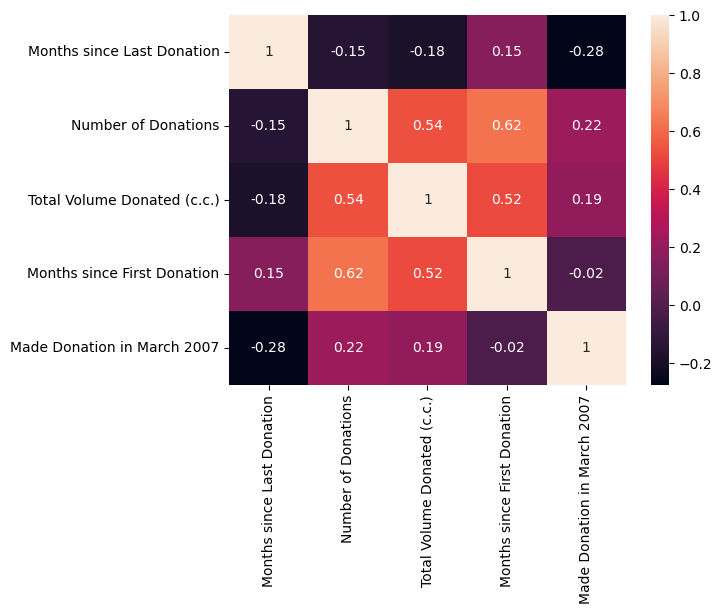

In [23]:
sns.heatmap(df.corr(),annot=True)   # used heatmap to view the correlation between all independent features

# Insights

* ### no any Features are Highly Correlated with each other as there are no any feature which are having more than 90% correlation with each other

# MODEL SELECTION

In [24]:
x=df.drop('Made Donation in March 2007',axis=1)   # Defined independent variables (all features except target)
y = df['Made Donation in March 2007']   # Defined dependent variable (target column)

In [25]:
x.head()  # contains all independent features

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
619,0.076923,50,0.230769,1.000000
664,0.000000,13,0.923077,0.270833
441,0.038462,16,0.230769,0.343750
160,0.076923,20,0.230769,0.447917
358,0.038462,24,0.230769,0.781250


In [26]:
y.head()  # contains Target Feature

619    1
664    1
441    1
160    1
358    0
Name: Made Donation in March 2007, dtype: int64

# MODEL CREATION

In [27]:
from sklearn.model_selection import train_test_split    # import train_test_split from sklearn.model_selection 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11) 
# Split the dataset into training (80%) and testing (20%) sets with a fixed random state for reproducibility

In [28]:
x_train.head()   # contains training data features (independent variables)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
324,0.538462,8,0.538462,0.500000
153,0.538462,4,0.230769,0.250000
421,0.076923,6,0.384615,0.406250
422,0.500000,3,0.153846,0.125000
526,0.423077,4,0.230769,0.260417


In [29]:
y_train.head()   # contains training data labels (dependent/target variable)

324    1
153    0
421    1
422    1
526    0
Name: Made Donation in March 2007, dtype: int64

In [30]:
x_test.head()    # contains testing data features (independent variables)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
647,0.538462,4,0.230769,0.208333
716,0.423077,4,0.230769,0.583333
376,0.076923,6,0.384615,0.208333
525,0.807692,1,0.000000,0.197917
639,0.615385,3,0.153846,0.218750


In [31]:
y_test.head()   # contains testing data labels (dependent/target variable)

647    1
716    0
376    1
525    1
639    0
Name: Made Donation in March 2007, dtype: int64

# Checking for data imbalancing

* ### as in the visualisation section we have seen that non donor people are more as compare to donor people and as we know it is binary class classification problem so data imbalancing can create problem to predict the output so we need to check for data imbalancing and need to balance them to avoid biasness

In [32]:
df["Made Donation in March 2007"].value_counts()     # checked for data imbalancing using value_counts

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

# Insights

* #### data is imbalanced as there is 438 values in 0 and 138 values in 1

* #### Balancing the dependent feature using SMOTE()

In [33]:
from imblearn.over_sampling import SMOTE   # import SMOTE from imblearn.over_sampling
sm = SMOTE()    # stored SMOTE as function in variable named "sm"
x_train_smote,y_train_smote = sm.fit_resample(x_train, y_train)

In [34]:
from collections import Counter   # import counter to count the values of class 0 and 1 in dependent Feature.

In [35]:
print("Before applying Balancing Technique",Counter(y_train))  # print the values of class 0 and 1 of dependent feature before Balancing
print("After applying Balancing Technique",Counter(y_train_smote))   # print the values of class 0 and 1 of dependent feature after Balancing

Before applying Balancing Technique Counter({0: 348, 1: 112})
After applying Balancing Technique Counter({1: 348, 0: 348})


* ## Applying different Machine learning model to measure the perfomance of the model

## LOGISTICS REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression    # import logistics regression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report  # import different matrics 
lr = LogisticRegression() # Stored model in variable named lr
lr.fit(x_train_smote,y_train_smote)  # trained the model
y_pred = lr.predict(x_test)    # predict the test data and stored in variable named y_pred
y_pred_train = lr.predict(x_train_smote)   # predict the train data and stored in variable named y_pred_train
print("Testing accuracy",accuracy_score(y_test,y_pred))   # testing accuracy
print("Training accuracy",accuracy_score(y_train_smote,y_pred_train))  # training accuracy
print("Testing confusion matrix\n",confusion_matrix(y_test,y_pred))  # testing confusion matrix
print("training confusion matrix\n",confusion_matrix(y_train_smote,y_pred_train))  # training confusion matrix
print("Testing classification Report")  
print(classification_report(y_test,y_pred))
print("Training classification Report")
print(classification_report(y_train_smote,y_pred_train))

Testing accuracy 0.6637931034482759
Training accuracy 0.6910919540229885
Testing confusion matrix
 [[58 32]
 [ 7 19]]
training confusion matrix
 [[214 134]
 [ 81 267]]
Testing classification Report
              precision    recall  f1-score   support

           0       0.89      0.64      0.75        90
           1       0.37      0.73      0.49        26

    accuracy                           0.66       116
   macro avg       0.63      0.69      0.62       116
weighted avg       0.78      0.66      0.69       116

Training classification Report
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       348
           1       0.67      0.77      0.71       348

    accuracy                           0.69       696
   macro avg       0.70      0.69      0.69       696
weighted avg       0.70      0.69      0.69       696



## HYPERPARAMETER OF LOGISTICS REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression hyperparameter grid
params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["lbfgs", "liblinear","saga"],
    "l1_ratio": [None, 0.25, 0.5, 0.75]  
}

lr_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=10000, random_state=11),
    param_distributions=params,
    cv=3,
    scoring="accuracy",
    verbose=3,
    n_jobs=1,
    n_iter=20,
    refit=True
)

lr_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=0.001, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.500 total time=   0.0s
[CV 2/3] END C=0.001, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.500 total time=   0.0s
[CV 3/3] END C=0.001, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.500 total time=   0.0s
[CV 1/3] END C=1, l1_ratio=0.5, penalty=l1, solver=liblinear;, score=0.642 total time=   0.0s
[CV 2/3] END C=1, l1_ratio=0.5, penalty=l1, solver=liblinear;, score=0.754 total time=   0.0s
[CV 3/3] END C=1, l1_ratio=0.5, penalty=l1, solver=liblinear;, score=0.681 total time=   0.0s
[CV 1/3] END C=100, l1_ratio=0.5, penalty=l2, solver=liblinear;, score=0.642 total time=   0.0s
[CV 2/3] END C=100, l1_ratio=0.5, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 3/3] END C=100, l1_ratio=0.5, penalty=l2, solver=liblinear;, score=0.685 total time=   0.0s
[CV 1/3] END C=0.01, l1_ratio=0.75, penalty=l2, solver=lbfgs;, sco

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=10000,
                                                random_state=11),
                   n_iter=20, n_jobs=1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'l1_ratio': [None, 0.25, 0.5, 0.75],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   scoring='accuracy', verbose=3)

In [38]:
y_pred2_test = lr_search.predict(x_test)
y_pred2_train = lr_search.predict(x_train_smote)

print("Best Parameters:", lr_search.best_params_)
print("Testing accuracy:", accuracy_score(y_test, y_pred2_test))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred2_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred2_test))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred2_train))
print("Testing classification Report")
print(classification_report(y_test,y_pred2_test))
print("Training classification Report")
print(classification_report(y_train_smote,y_pred2_train))

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': None, 'C': 1}
Testing accuracy: 0.6724137931034483
Training accuracy: 0.6882183908045977
Testing confusion matrix:
 [[59 31]
 [ 7 19]]
Training confusion matrix:
 [[214 134]
 [ 83 265]]
Testing classification Report
              precision    recall  f1-score   support

           0       0.89      0.66      0.76        90
           1       0.38      0.73      0.50        26

    accuracy                           0.67       116
   macro avg       0.64      0.69      0.63       116
weighted avg       0.78      0.67      0.70       116

Training classification Report
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       348
           1       0.66      0.76      0.71       348

    accuracy                           0.69       696
   macro avg       0.69      0.69      0.69       696
weighted avg       0.69      0.69      0.69       696



## SUPPORT VECTOR MACHINE

In [39]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(x_train_smote, y_train_smote)
# pred = svc.predict(x_test)
# pred_train = svc.predict(x_train_smote)
# print("Testing accuracy:", accuracy_score(y_test, pred))
# print("Training accuracy:", accuracy_score(y_train_smote, pred_train))
# print("Testing confusion matrix:\n", confusion_matrix(y_test, pred))
# print("Training confusion matrix:\n", confusion_matrix(y_train_smote, pred_train))


## HYPERPARAMETER OF SVC

In [40]:
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     "C": [0.1, 1, 10, 100],
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "gamma": ["scale", "auto", 0.01, 0.001],
#     "degree": [2, 3, 4]  
# }

# svc_search = RandomizedSearchCV(
#     estimator=SVC(),param_distributions=params,cv=3,
#     scoring="accuracy",verbose=3,n_jobs=1,n_iter=20,refit=True
# )

# svc_search.fit(x_train_smote, y_train_smote)

In [41]:
# pred_test = svc_search.predict(x_test)
# pred_train = svc_search.predict(x_train_smote)

# print("Testing accuracy:", accuracy_score(y_test, pred_test))
# print("Training accuracy:", accuracy_score(y_train_smote, pred_train))
# print("Testing confusion matrix:\n", confusion_matrix(y_test, pred_test))
# print("Training confusion matrix:\n", confusion_matrix(y_train_smote, pred_train))
# print("Testing classification Report")
# print(classification_report(y_test,y_pred_test))
# print("Training classification Report")
# print(classification_report(y_train_smote,y_pred_train))

## DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=33)
dt.fit(x_train_smote, y_train_smote)
y_pred3 = dt.predict(x_test)
y_pred3_train = dt.predict(x_train_smote)
print("Testing accuracy:", accuracy_score(y_test, y_pred3))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred3_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred3))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred3_train))

Testing accuracy: 0.7068965517241379
Training accuracy: 0.9540229885057471
Testing confusion matrix:
 [[70 20]
 [14 12]]
Training confusion matrix:
 [[345   3]
 [ 29 319]]


## HYPERPARAMETER OF DECISION TREE

In [43]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [2, 3, 4, 5, 10, 200],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": [None, "sqrt", "log2"]
}

dt_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=params,cv=5,scoring="accuracy",
    verbose=3,n_jobs=1,n_iter=50,refit=True
)

dt_search.fit(x_train_smote, y_train_smote)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=entropy, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.671 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.719 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.614 total time=   0.0

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 10, 200],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=3)

In [44]:
y_pred4_test = dt_search.predict(x_test)
y_pred4_train = dt_search.predict(x_train_smote)

print("Testing accuracy:", accuracy_score(y_test, y_pred4_test))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred4_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred4_test))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred4_train))


Testing accuracy: 0.75
Training accuracy: 0.9037356321839081
Testing confusion matrix:
 [[75 15]
 [14 12]]
Training confusion matrix:
 [[320  28]
 [ 39 309]]


## RANDOM FOREST CLASSIFIER

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=99)
rf.fit(x_train_smote, y_train_smote)
y_pred5 = rf.predict(x_test)
y_pred5_train = rf.predict(x_train_smote)
print("Testing accuracy:", accuracy_score(y_test, y_pred5))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred5_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred5))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred_train))


Testing accuracy: 0.7586206896551724
Training accuracy: 0.9540229885057471
Testing confusion matrix:
 [[75 15]
 [13 13]]
Training confusion matrix:
 [[214 134]
 [ 81 267]]


## HYPERPARAMETER OF RANDOM FOREST CLASSIFIER

In [46]:
from sklearn.model_selection import RandomizedSearchCV


params = {
    "n_estimators": [50, 100, 200, 300, 500],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=99),param_distributions=params,cv=3,
    scoring="accuracy",verbose=3,n_jobs=1,n_iter=30,refit=True
)

rf_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.720 total time=   0.7s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.832 total time=   0.5s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.746 total time=   0.5s
[CV 1/3] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.728 total time=   0.4s
[CV 2/3] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.819 total time=   0.4s
[CV 3/3] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=99),
                   n_iter=30, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   scoring='accuracy', verbose=3)

In [47]:
y_pred6_test = rf_search.predict(x_test)
y_pred6_train = rf_search.predict(x_train_smote)

# Accuracy and confusion matrices
print("Testing accuracy:", accuracy_score(y_test, y_pred6_test))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred6_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred6_test))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred6_train))


Testing accuracy: 0.7758620689655172
Training accuracy: 0.8146551724137931
Testing confusion matrix:
 [[73 17]
 [ 9 17]]
Training confusion matrix:
 [[281  67]
 [ 62 286]]


## BAGGING CLASSIFIER

In [48]:
from sklearn.ensemble import BaggingClassifier
base_dt = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(
    estimator=base_dt,  
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging.fit(x_train_smote, y_train_smote)
y_pred7 = bagging.predict(x_test)
y_pred7_train = bagging.predict(x_train_smote)
print("Testing accuracy:", accuracy_score(y_test, y_pred7))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred7_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred7))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred7_train))


Testing accuracy: 0.7413793103448276
Training accuracy: 0.9540229885057471
Testing confusion matrix:
 [[73 17]
 [13 13]]
Training confusion matrix:
 [[335  13]
 [ 19 329]]


# HYPERPARAMETER OF BAGGING CLASSIFIER

In [49]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators": [10, 20, 50, 100, 200],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False],
    "estimator__max_depth": [None, 5, 10, 20],
    "estimator__min_samples_split": [2, 5, 10],
    "estimator__min_samples_leaf": [1, 2, 4]
}

base_dt = DecisionTreeClassifier(random_state=42)

bagging_search = RandomizedSearchCV(
    estimator=BaggingClassifier(
        estimator=base_dt,
        random_state=42,
        n_jobs=-1
    ),
    param_distributions=params,
    cv=3,
    scoring="accuracy",
    verbose=3,
    n_jobs=-1,
    n_iter=30,
    refit=True
)

bagging_search.fit(x_train_smote, y_train_smote)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                               n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'estimator__max_depth': [None, 5, 10,
                                                                 20],
                                        'estimator__min_samples_leaf': [1, 2,
                                                                        4],
                                        'estimator__min_samples_split': [2, 5,
                                                                         10],
                                        'max_features': [0.5, 0.7, 1.0],
                                        'max_samples': [0.5, 0.7, 1.0],
                                        'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='accuracy', verbose=3)

In [50]:
y_pred8_test = bagging_search.predict(x_test)
y_pred8_train = bagging_search.predict(x_train_smote)


print("Testing accuracy:", accuracy_score(y_test, y_pred8_test))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred8_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred8_test))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred8_train))


Testing accuracy: 0.7758620689655172
Training accuracy: 0.8979885057471264
Testing confusion matrix:
 [[74 16]
 [10 16]]
Training confusion matrix:
 [[317  31]
 [ 40 308]]


# Adabooster Classifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(
    n_estimators=100,     
    learning_rate=1.0,
    random_state=99
)
adaboost.fit(x_train_smote, y_train_smote)
y_pred9 = adaboost.predict(x_test)
y_pred9_train = adaboost.predict(x_train_smote)
print("Testing accuracy:", accuracy_score(y_test, y_pred9))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred9_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred9))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred9_train))


Testing accuracy: 0.7155172413793104
Training accuracy: 0.7844827586206896
Testing confusion matrix:
 [[67 23]
 [10 16]]
Training confusion matrix:
 [[255  93]
 [ 57 291]]


## BOOSTING CLASSIFIER

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train_smote,y_train_smote)
y_pred10 = GB.predict(x_test)
y_pred10_train = GB.predict(x_train_smote)
print("Testing accuracy",accuracy_score(y_test,y_pred10))
print("Training accuracy",accuracy_score(y_train_smote,y_pred10_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred10))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred10_train))

Testing accuracy 0.7844827586206896
Training accuracy 0.8620689655172413
Testing confusion matrix:
 [[75 15]
 [10 16]]
Training confusion matrix:
 [[304  44]
 [ 52 296]]


# ARTIFICIAL NEURAL NETWORK

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

ANN = MLPClassifier()
ANN.fit(x_train_smote, y_train_smote)

y_pred11_ann = ANN.predict(x_test)
y_pred11_ann_train = ANN.predict(x_train_smote)
print("Testing accuracy", accuracy_score(y_test, y_pred11_ann))
print("Training accuracy", accuracy_score(y_train_smote, y_pred11_ann_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred11_ann))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred11_ann_train))


Testing accuracy 0.7672413793103449
Training accuracy 0.7270114942528736
Testing confusion matrix:
 [[71 19]
 [ 8 18]]
Training confusion matrix:
 [[248 100]
 [ 90 258]]


# HYPERPARAMETER OF ANN

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(max_iter=500, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100,50), (50,30,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(estimator=ann, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=2, n_jobs=1)

grid_search.fit(x_train_smote, y_train_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
best_ann = grid_search.best_estimator_




Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptiv

In [55]:
y_pred12_test = best_ann.predict(x_test)
y_pred12_train = best_ann.predict(x_train_smote)
print("Testing accuracy:", accuracy_score(y_test, y_pred12_test))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred12_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred12_test))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred12_train))

Testing accuracy: 0.7586206896551724
Training accuracy: 0.757183908045977
Testing confusion matrix:
 [[71 19]
 [ 9 17]]
Training confusion matrix:
 [[254  94]
 [ 75 273]]


# K-NEAREST-NEIGHBOUR

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train_smote, y_train_smote)

y_pred13 = knn.predict(x_test)
y_pred13_train = knn.predict(x_train_smote)


In [57]:
print("Testing accuracy:", accuracy_score(y_test, y_pred13))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred13_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred13))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred13_train))

Testing accuracy: 0.7413793103448276
Training accuracy: 0.8232758620689655
Testing confusion matrix:
 [[70 20]
 [10 16]]
Training confusion matrix:
 [[283  65]
 [ 58 290]]


# XGBOOST CLASSIFIER

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=19, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train_smote, y_train_smote)
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb_train = xgb.predict(x_train_smote)
print("Testing accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Training accuracy:", accuracy_score(y_train_smote, y_pred_xgb_train))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Training confusion matrix:\n", confusion_matrix(y_train_smote, y_pred_xgb_train))

Testing accuracy: 0.7844827586206896
Training accuracy: 0.9454022988505747
Testing confusion matrix:
 [[78 12]
 [13 13]]
Training confusion matrix:
 [[335  13]
 [ 25 323]]


# MODEL COMPARISION REPORT 

In [59]:
results = {
    "Model": [
        "Logistic Regression", "Logistic Regression (Hyperparameter)",
        "Decision Tree", "Decision Tree (Hyperparameter)",
        "Random Forest", "Random Forest (Hyperparameter)",
        "Bagging Classifier", "Bagging Classifier (Hyperparameter)",
        "Boosting Classifier",
        "ANN", "ANN (Hyperparameter)",
        "KNN",
        "XGBOOST",
        "Adabooster classifier"
    ],
    "Testing Accuracy": [
        0.6637931034482759, 0.6724137931034483,
        0.7327586206896551, 0.7241379310344828,
        0.7586206896551724, 0.7844827586206896,
        0.7327586206896551, 0.7844827586206896,
        0.7586206896551724,
        0.7586206896551724, 0.7413793103448276,
        0.75,
        0.7931034482758621,
        0.7758620689655172
    ],
    "Training Accuracy": [
        0.7025862068965517, 0.7054597701149425,
        0.9525862068965517, 0.8520114942528736,
        0.9525862068965517, 0.8304597701149425,
        0.9525862068965517, 0.9109195402298851,
        0.8515406162464986,
        0.7212643678160919, 0.7183908045977011,
        0.8175287356321839,
        0.9410919540229885,
        0.7974137931034483
    ]
}

df1 = pd.DataFrame(results)

from IPython.display import display
display(df1)

,Model,Testing Accuracy,Training Accuracy
0,Logistic Regression,0.663793,0.702586
1,Logistic Regression (Hyperparameter),0.672414,0.705460
2,Decision Tree,0.732759,0.952586
3,Decision Tree (Hyperparameter),0.724138,0.852011
4,Random Forest,0.758621,0.952586
5,Random Forest (Hyperparameter),0.784483,0.830460
6,Bagging Classifier,0.732759,0.952586
7,Bagging Classifier (Hyperparameter),0.784483,0.910920
8,Boosting Classifier,0.758621,0.851541
9,ANN,0.758621,0.721264


# Conclusion of Model Comarision Report

I have used 6 Algorithmns which name are LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XGBRegressor and 
ANN_MLPClassifier for training the model.
I got 83 percentage in __Random forest classifier with hyperparameter Tunning__ which are maximum than all Algorithmn and its working Mindblowing some time prediction margin are few far even,after that model predict perfect result.
So,I am perfering __Random forest classifier with hyperparameter Tunning__ for predicting the Blood Donation Prediction.

# Report On Challenges Faced

* This is a __Blood Donation prediction__ which has __576__ entries,and total columns are __5__.  4        columns having __int64 datatype__ and 1 column which is our target variable it has __integer datatype__ in binary.
* In our dataset no columns having  missing value.
* There are 3 continuous feature in our dataset in which i had handled Outliers.
* In feature Selection every columns are __co-related__ that's why i used all columns in feature selection.and used some     different __Classification Algorithmns__.
* dataset was imbalanced so i had balanced the dataset using __SMOTE()__ function.

In [61]:
pickle.dump(rf_search,open("Model.pkl","wb"))

## Pickle is used to save and load a model

* #### This model has been deployed so that people can easily interact with it and understand its purpose.
* #### When a model exists only in code, it is mainly useful for developers and engineers.
* #### Deployment makes it accessible to everyone, allowing users to experience how the model works in real life.
* #### It helps demonstrate what the Blood Donation Prediction model means and how its predictions can be useful.
* #### In short, deployment bridges the gap between technical development and real-world understanding.
* #### by this vision i had deployed this model